In [6]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [8]:
df = pd.read_csv('bus_table.csv')
df.head()

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [12]:
df.describe()

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [14]:
df_null = (df[df.isna().any(axis=1)]).copy()
df_null.head()

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,NaN,16:00:57
471,2016-03-31,A,south,NaN,15:28:05
588,2016-03-30,A,south,NaN,14:52:36
599,2016-03-30,A,south,NaN,15:12:06
685,2016-03-29,A,south,NaN,17:56:29


In [16]:
df_null.shape

(240, 5)

In [18]:
df = df[df.notna().all(axis=1)]
df.isna().sum()

data         0
route        0
direction    0
scheduled    0
actual       0
dtype: int64

## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [21]:
df['table'] = pd.to_datetime(df['data'] + ' ' + df['scheduled'])
df

,data,route,direction,scheduled,actual,table
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57
...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29


In [23]:
df['arrival'] = pd.to_datetime(df['data'] + ' ' + df['actual'])
df

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [25]:
# Задание 4.2-4.3
def df_convert(df1):
    concat_list = []

    for route in df1.route.unique():
        for direction in df1.direction.unique():
            df_temp = df1[(df1['route'] == route) & (df['direction'] == direction)].sort_values(by=['data', 'scheduled'], ignore_index=True)
            df_temp0 = df_temp.shift(1)
        
            df_temp['interval'] = (df_temp['table'].astype('int64') - df_temp0.loc[df_temp0.notna().all(axis=1),'table'].astype('int64')) / (10 ** 9 * 60) 
            df_temp['arr_interval'] = (df_temp['arrival'].astype('int64') - df_temp0.loc[df_temp0.notna().all(axis=1),'arrival'].astype('int64')) / (10 ** 9 * 60)
        
            concat_list.append(df_temp.copy())
        
    return pd.concat(concat_list, axis=0).reset_index(drop=True)
df_new = df_convert(df)
df_new

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval
0,2016-03-26,A,south,00:04:57,00:05:18,2016-03-26 00:04:57,2016-03-26 00:05:18,NaN,NaN
1,2016-03-26,A,south,00:34:57,00:36:02,2016-03-26 00:34:57,2016-03-26 00:36:02,30.0,30.733333
2,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19,37.0,37.283333
3,2016-03-26,A,south,02:09:57,02:09:19,2016-03-26 02:09:57,2016-03-26 02:09:19,58.0,56.000000
4,2016-03-26,A,south,05:34:57,05:35:03,2016-03-26 05:34:57,2016-03-26 05:35:03,205.0,205.733333
...,...,...,...,...,...,...,...,...,...
38912,2016-05-27,B,north,22:35:23,22:36:56,2016-05-27 22:35:23,2016-05-27 22:36:56,15.0,12.450000
38913,2016-05-27,B,north,22:50:23,22:50:25,2016-05-27 22:50:23,2016-05-27 22:50:25,15.0,13.483333
38914,2016-05-27,B,north,23:05:23,23:08:56,2016-05-27 23:05:23,2016-05-27 23:08:56,15.0,18.516667
38915,2016-05-27,B,north,23:20:23,23:19:40,2016-05-27 23:20:23,2016-05-27 23:19:40,15.0,10.733333


In [27]:
df_new.describe()

,table,arrival,interval,arr_interval
count,38917,38917,38911.000000,38911.000000
mean,2016-04-26 18:28:35.094046208,2016-04-26 18:28:46.243440896,13.984425,13.947301
min,2016-03-26 00:00:25,2016-03-26 00:02:35,0.000000,-1435.666667
25%,2016-04-11 07:23:31,2016-04-11 07:23:14,8.000000,7.583333
50%,2016-04-26 17:05:29,2016-04-26 17:06:58,12.000000,11.583333
75%,2016-05-12 12:57:28,2016-05-12 12:54:17,15.000000,15.466667
max,2016-05-27 23:59:58,2016-05-27 23:57:15,314.000000,1494.800000
std,NaN,NaN,17.446706,95.564649


In [29]:
# Задание 4.1
top3 = df_new.groupby(['route', 'direction'], as_index=False)['interval'].value_counts().reset_index(drop=True)
top3 = top3.groupby(['route','direction'], as_index=False).apply(lambda x: x[:3]).reset_index(drop=True).set_index(['route', 'direction', 'interval'])
top3

count
route direction interval       
A     north     12.0       1434
                15.0       1377
                7.0         756
      south     15.0       1453
                12.0       1312
                8.0         710
B     north     15.0       1507
                12.0       1413
                8.0        1141
      south     15.0       1391
                12.0       1300
                8.0        1159
C     north     10.0       1869
                15.0        590
                6.0         552
      south     10.0       1342
                12.0       1087
                15.0       1049

## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [31]:
df_new['delay'] = (df_new.loc[:,'table'].astype('int64') - df_new.loc[:,'arrival'].astype('int64')) / (10 ** 9 * 60) 
df_new

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,delay
0,2016-03-26,A,south,00:04:57,00:05:18,2016-03-26 00:04:57,2016-03-26 00:05:18,NaN,NaN,-0.350000
1,2016-03-26,A,south,00:34:57,00:36:02,2016-03-26 00:34:57,2016-03-26 00:36:02,30.0,30.733333,-1.083333
2,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19,37.0,37.283333,-1.366667
3,2016-03-26,A,south,02:09:57,02:09:19,2016-03-26 02:09:57,2016-03-26 02:09:19,58.0,56.000000,0.633333
4,2016-03-26,A,south,05:34:57,05:35:03,2016-03-26 05:34:57,2016-03-26 05:35:03,205.0,205.733333,-0.100000
...,...,...,...,...,...,...,...,...,...,...
38912,2016-05-27,B,north,22:35:23,22:36:56,2016-05-27 22:35:23,2016-05-27 22:36:56,15.0,12.450000,-1.550000
38913,2016-05-27,B,north,22:50:23,22:50:25,2016-05-27 22:50:23,2016-05-27 22:50:25,15.0,13.483333,-0.033333
38914,2016-05-27,B,north,23:05:23,23:08:56,2016-05-27 23:05:23,2016-05-27 23:08:56,15.0,18.516667,-3.550000
38915,2016-05-27,B,north,23:20:23,23:19:40,2016-05-27 23:20:23,2016-05-27 23:19:40,15.0,10.733333,0.716667


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

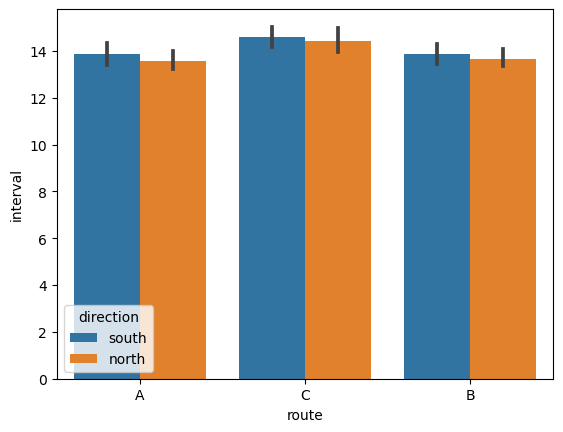

In [33]:
sns.barplot(data=df_new, x='route', y='interval', hue='direction')
plt.show()

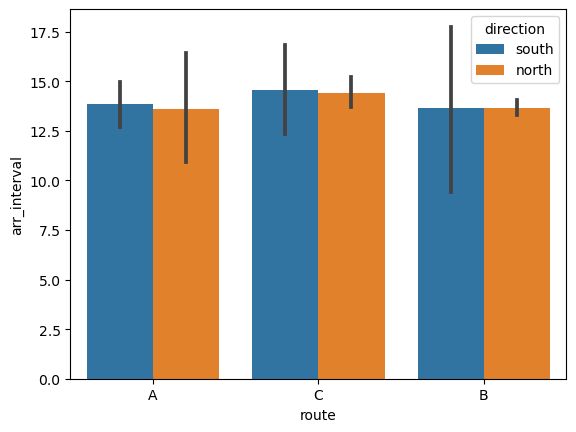

In [35]:
sns.barplot(data=df_new, x='route', y='arr_interval', hue='direction')
plt.show()

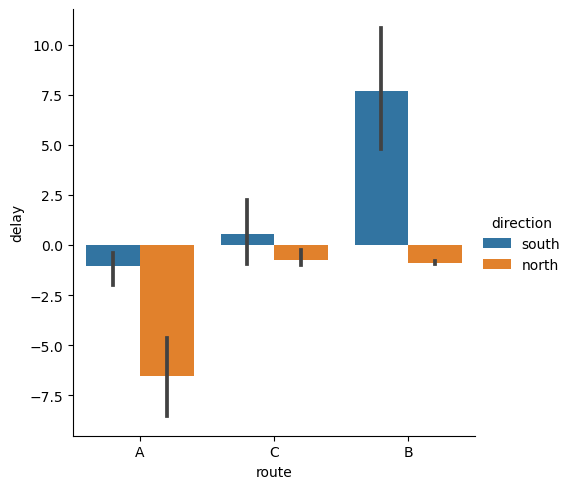

In [37]:
sns.catplot(data=df_new, x='route', y='delay', hue='direction', kind='bar')
plt.show()

In [39]:
# Видим, что в столбцах delay и  arr_interval большие выбросы
df_new.describe()

,table,arrival,interval,arr_interval,delay
count,38917,38917,38911.000000,38911.000000,38917.000000
mean,2016-04-26 18:28:35.094046208,2016-04-26 18:28:46.243440896,13.984425,13.947301,-0.185823
min,2016-03-26 00:00:25,2016-03-26 00:02:35,0.000000,-1435.666667,-1439.383333
25%,2016-04-11 07:23:31,2016-04-11 07:23:14,8.000000,7.583333,-2.700000
50%,2016-04-26 17:05:29,2016-04-26 17:06:58,12.000000,11.583333,-0.500000
75%,2016-05-12 12:57:28,2016-05-12 12:54:17,15.000000,15.466667,1.000000
max,2016-05-27 23:59:58,2016-05-27 23:57:15,314.000000,1494.800000,1439.716667
std,NaN,NaN,17.446706,95.564649,66.484719


In [41]:
# Это связано с тем, что у нас нету даты актуального прибытия. Автобус может приехать в другой день и опаздать или прийти раньше с разницой в несколько минут
temp_mask_late = (df['table'].astype('int64') - df['arrival'].astype('int64')) // (10 ** 9 * 60) > 1300
df['arrival'] = (df['arrival'] + pd.to_timedelta(1, unit='D')).where(temp_mask_late, df['arrival'])
        
temp_mask_early = (df['table'].astype('int64') - df['arrival'].astype('int64')) // (10 ** 9 * 60) < -1380
df['arrival'] = (df['arrival'] - pd.to_timedelta(1, unit='D')).where(temp_mask_early, df['arrival'])

In [43]:
df_corrected = df_convert(df)
df_corrected['delay'] = (df_corrected.loc[:,'table'].astype('int64') - df_corrected.loc[:,'arrival'].astype('int64')) / (10 ** 9 * 60) 
df_corrected

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,delay
0,2016-03-26,A,south,00:04:57,00:05:18,2016-03-26 00:04:57,2016-03-26 00:05:18,NaN,NaN,-0.350000
1,2016-03-26,A,south,00:34:57,00:36:02,2016-03-26 00:34:57,2016-03-26 00:36:02,30.0,30.733333,-1.083333
2,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19,37.0,37.283333,-1.366667
3,2016-03-26,A,south,02:09:57,02:09:19,2016-03-26 02:09:57,2016-03-26 02:09:19,58.0,56.000000,0.633333
4,2016-03-26,A,south,05:34:57,05:35:03,2016-03-26 05:34:57,2016-03-26 05:35:03,205.0,205.733333,-0.100000
...,...,...,...,...,...,...,...,...,...,...
38912,2016-05-27,B,north,22:35:23,22:36:56,2016-05-27 22:35:23,2016-05-27 22:36:56,15.0,12.450000,-1.550000
38913,2016-05-27,B,north,22:50:23,22:50:25,2016-05-27 22:50:23,2016-05-27 22:50:25,15.0,13.483333,-0.033333
38914,2016-05-27,B,north,23:05:23,23:08:56,2016-05-27 23:05:23,2016-05-27 23:08:56,15.0,18.516667,-3.550000
38915,2016-05-27,B,north,23:20:23,23:19:40,2016-05-27 23:20:23,2016-05-27 23:19:40,15.0,10.733333,0.716667


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38917 entries, 0 to 39156
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       38917 non-null  object        
 1   route      38917 non-null  object        
 2   direction  38917 non-null  object        
 3   scheduled  38917 non-null  object        
 4   actual     38917 non-null  object        
 5   table      38917 non-null  datetime64[ns]
 6   arrival    38917 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 2.4+ MB


In [41]:
df_corrected.describe()

,table,arrival,interval,arr_interval,delay
count,38917,38917,38911.000000,38911.000000,38917.000000
mean,2016-04-26 18:28:35.094046208,2016-04-26 18:30:03.947272448,13.984425,13.984309,-1.480887
min,2016-03-26 00:00:25,2016-03-26 00:05:01,0.000000,-69.216667,-150.283333
25%,2016-04-11 07:23:31,2016-04-11 07:23:14,8.000000,7.600000,-2.716667
50%,2016-04-26 17:05:29,2016-04-26 17:06:58,12.000000,11.600000,-0.516667
75%,2016-05-12 12:57:28,2016-05-12 12:59:41,15.000000,15.500000,0.983333
max,2016-05-27 23:59:58,2016-05-28 00:01:28,314.000000,314.116667,12.866667
std,NaN,NaN,17.446706,18.075339,4.945535


In [45]:
df_corrected[df_corrected['arr_interval']  < 0]

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,delay
187,2016-03-28,A,south,08:23:57,08:26:26,2016-03-28 08:23:57,2016-03-28 08:26:26,9.000000,-2.083333,-2.483333
241,2016-03-28,A,south,16:51:56,16:50:50,2016-03-28 16:51:56,2016-03-28 16:50:50,5.000000,-7.633333,1.100000
477,2016-03-30,A,south,17:58:56,17:57:54,2016-03-30 17:58:56,2016-03-30 17:57:54,10.000000,-1.500000,1.033333
521,2016-03-31,A,south,07:28:57,07:28:48,2016-03-31 07:28:57,2016-03-31 07:28:48,9.000000,-2.933333,0.150000
533,2016-03-31,A,south,09:04:57,09:06:02,2016-03-31 09:04:57,2016-03-31 09:06:02,8.000000,-1.800000,-1.083333
...,...,...,...,...,...,...,...,...,...,...
37487,2016-05-14,B,north,13:31:21,13:31:44,2016-05-14 13:31:21,2016-05-14 13:31:44,12.000000,-1.366667,-0.383333
38025,2016-05-19,B,north,15:38:29,15:36:22,2016-05-19 15:38:29,2016-05-19 15:36:22,8.000000,-1.583333,2.116667
38532,2016-05-24,B,north,14:57:29,14:59:19,2016-05-24 14:57:29,2016-05-24 14:59:19,4.000000,-1.433333,-1.833333
38644,2016-05-25,B,north,14:27:29,14:25:41,2016-05-25 14:27:29,2016-05-25 14:25:41,5.033333,-2.883333,1.800000


In [49]:
df_corrected.iloc[df_corrected[df_corrected['arr_interval']  < 0].index - 1]

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,delay
186,2016-03-28,A,south,08:14:57,08:28:31,2016-03-28 08:14:57,2016-03-28 08:28:31,7.0,20.133333,-13.566667
240,2016-03-28,A,south,16:46:56,16:58:28,2016-03-28 16:46:56,2016-03-28 16:58:28,6.0,18.616667,-11.533333
476,2016-03-30,A,south,17:48:56,17:59:24,2016-03-30 17:48:56,2016-03-30 17:59:24,8.0,12.133333,-10.466667
520,2016-03-31,A,south,07:19:57,07:31:44,2016-03-31 07:19:57,2016-03-31 07:31:44,9.0,21.300000,-11.783333
532,2016-03-31,A,south,08:56:57,09:07:50,2016-03-31 08:56:57,2016-03-31 09:07:50,8.0,20.333333,-10.883333
...,...,...,...,...,...,...,...,...,...,...
37486,2016-05-14,B,north,13:19:21,13:33:06,2016-05-14 13:19:21,2016-05-14 13:33:06,12.0,25.400000,-13.750000
38024,2016-05-19,B,north,15:30:29,15:37:57,2016-05-19 15:30:29,2016-05-19 15:37:57,4.0,10.733333,-7.466667
38531,2016-05-24,B,north,14:53:29,15:00:45,2016-05-24 14:53:29,2016-05-24 15:00:45,6.0,14.100000,-7.266667
38643,2016-05-25,B,north,14:22:27,14:28:34,2016-05-25 14:22:27,2016-05-25 14:28:34,8.0,12.583333,-6.116667


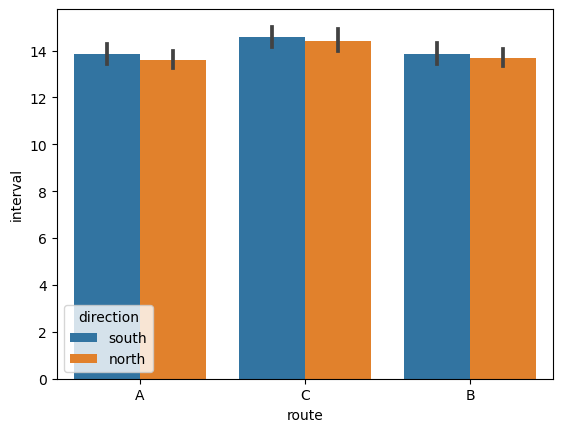

In [85]:
sns.barplot(data=df_corrected, x='route', y='interval', hue='direction')
plt.show()

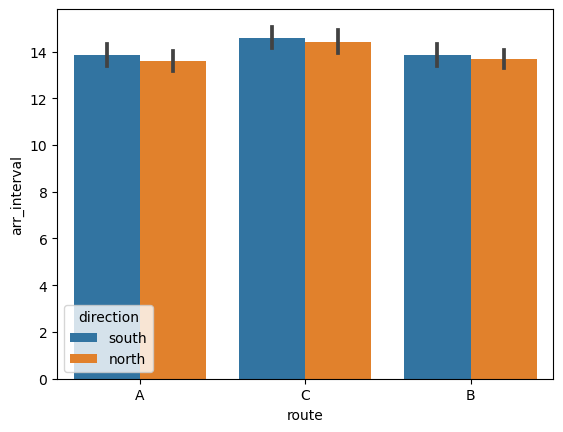

In [64]:
sns.barplot(data=df_corrected, x='route', y='arr_interval', hue='direction')
plt.show()

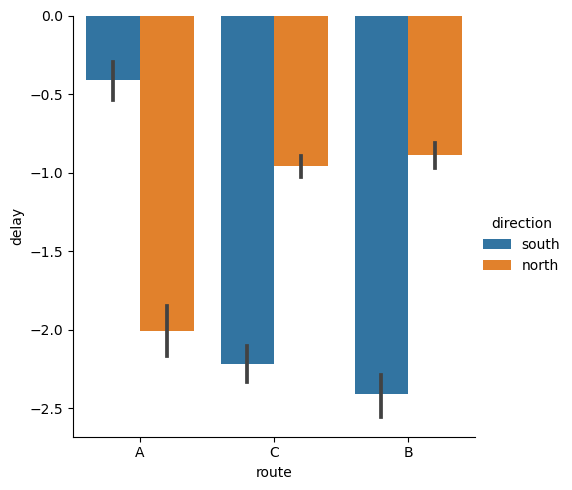

In [66]:
sns.catplot(data=df_corrected, x='route', y='delay', hue='direction', kind='bar')
plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

Зачастую автобусы приезжают раньше расписание на несколько минут. Интервалы между реальными прибытиями  в среднем для каждого маршрута различаются незначительно(меньше минуты).